### Import libraries

In [13]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

### Get data and split into train and test data

In [14]:
data = np.asarray(pd.read_csv('A5_q6.dat', header=None))

In [15]:
tr_split = int(0.8 * data.shape[0])
train = data[:tr_split]
test = data[tr_split:]

### Linear Regression Definition used from Q5

In [16]:
def MultipleLinearRegression(X,Y):
#     print("X.shape, Y.shape",(X.shape, Y.shape))
    temp1 = X.T.dot(X)
    temp2 = X.T.dot(Y)
    temp1 = np.linalg.inv(temp1)
#     print("temp1.shape, temp2.shape",(temp1.shape, temp2.shape))
    beta_hat = temp1.dot(temp2)
#     print("beta_hat.shape",beta_hat.shape)
    return(beta_hat)

### Graph plots

In [17]:
def plot(pred, test):
    plt.figure(figsize=(20,10))
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.title("Prediction vs Actual data", fontsize = 15)
    plt.xlabel("Point", fontsize = 15)
    plt.ylabel("Value", fontsize = 15)
    test = list(test.reshape(-1))
    plt.plot(pred)
    plt.plot(test)
    plt.legend(['Prediction', 'Actual'], prop={'size': 15})
    plt.savefig('a.jpg', bbox_inches='tight', pad_inches = 1)
    plt.show()

### Average Percentage error definition

In [18]:
def error(pred, test):
    perc_err = 0
    for i in range(len(pred)):
        perc_err += (abs(pred[i] - test[i][0]) / test[i][0] * 100)
    print(perc_err / len(test))

### EWMA

In [19]:
# def EWMA1(train, test, alpha):
#     train = list(train.reshape(-1))
#     n = len(train)
#     m_alp = 1 - alpha
#     for j in range(len(test)):
#         tmp = 1
#         t_alp = 1
#         for i in reversed(range(len(train))):
#             tmp += (t_alp * train[i])
#             t_alp *= m_alp
#         train.append(alpha * tmp)
#     pred = train[n:]   
#     return pred

In [20]:
def EWMA(train, test, alpha):
    pred = [train[-1][0]]
    for i in range(test.shape[0] - 1):
        n_pred = alpha * test[i][0] + (1 - alpha) * pred[i]
        pred.append(n_pred)
    return pred

### Seasonal

In [21]:
def Seasonal(train, test, s):
    pred = []
    for i in range(len(test)):
        pred.append(train[i - s][0])
    return pred

### AR model

In [22]:
# def ARmod1(train, test, p):
#     Y = train[p:]
#     X = []
#     init_y = train[:p].reshape(-1)
#     init_y = np.flip(init_y, 0)
#     X.append(np.insert(init_y, 0, 1))
#     for i in range(Y.shape[0] - 1):
#         init_y = np.roll(init_y, 1)
#         init_y[0] = Y[i][0]
#         X.append(np.insert(init_y, 0, 1))
#     X = np.asarray(X)
#     beta = MultipleLinearRegression(X, Y)
#     for i in range(test.shape[0]):
#         init_y = np.roll(init_y, 1)
#         init_y[0] = Y[-1][0]
#         new_x = np.insert(init_y, 0, 1).reshape(-1,1)
#         Y = np.append(Y, beta.T.dot(new_x))
#         Y = Y.reshape(-1, 1)
#     return Y[train.shape[0] - p:].reshape(-1)

In [23]:
def ARmod(train, test, p):
    Y = train[p:]
    X = []
    pred = []
    init_y = train[:p].reshape(-1)
    init_y = np.flip(init_y, 0)
    X.append(np.insert(init_y, 0, 1))
    for i in range(Y.shape[0] - 1):
        init_y = np.roll(init_y, 1)
        init_y[0] = Y[i][0]
        X.append(np.insert(init_y, 0, 1))
    beta = MultipleLinearRegression(np.asarray(X), Y)
    for i in range(test.shape[0]):
        init_y = np.roll(init_y, 1)
        init_y[0] = Y[-1][0]
        new_x = np.insert(init_y, 0, 1)
        pred.append(beta.T.dot(new_x)[0])
        X.append(new_x)
        Y = np.append(Y, test[i])
        Y = Y.reshape(-1, 1)
        beta = MultipleLinearRegression(np.asarray(X), Y)
    return pred

### 6. a

6.848918540923384


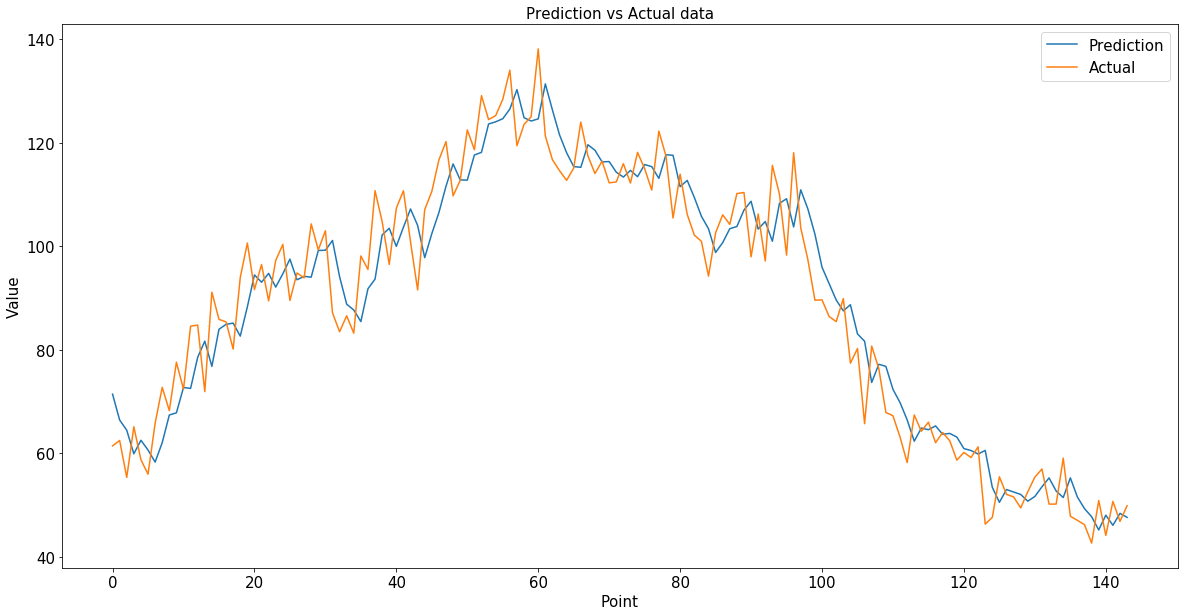

In [25]:
out = EWMA(train, test, 0.5)
error(out, test)
plot(out, test)

### 6.b

6.968071314741476


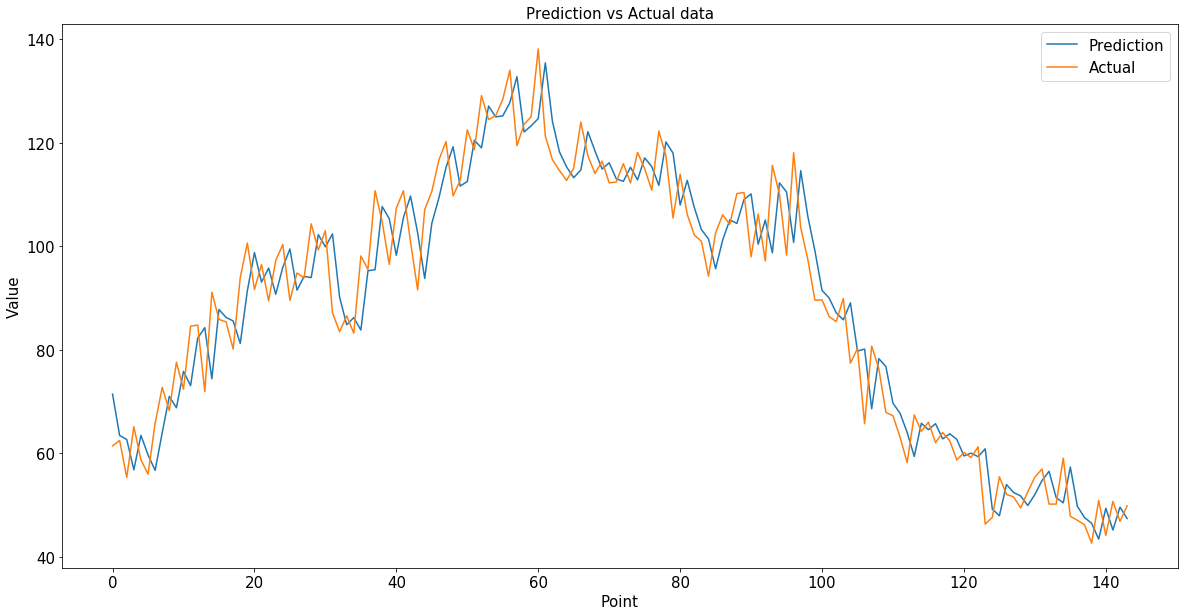

In [26]:
out = EWMA(train, test, 0.8)
error(out, test)
plot(out, test)

### 6.c

16.078203501786774


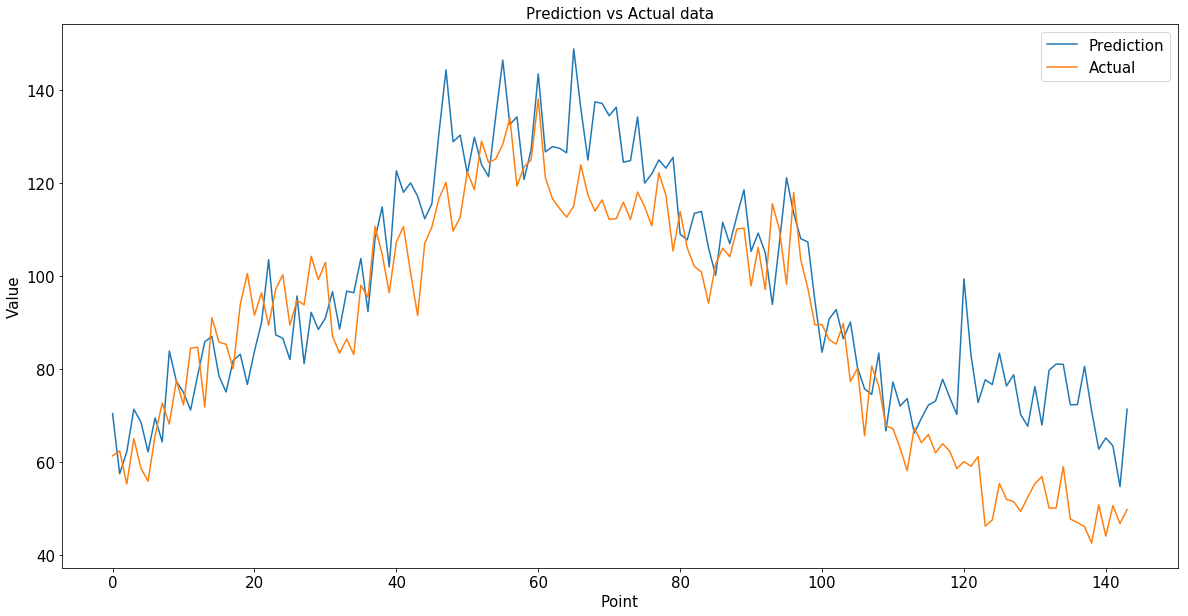

In [27]:
out = Seasonal(train, test, 144)
error(out, test)
plot(out, test)

### 6.d

7.532678336404786


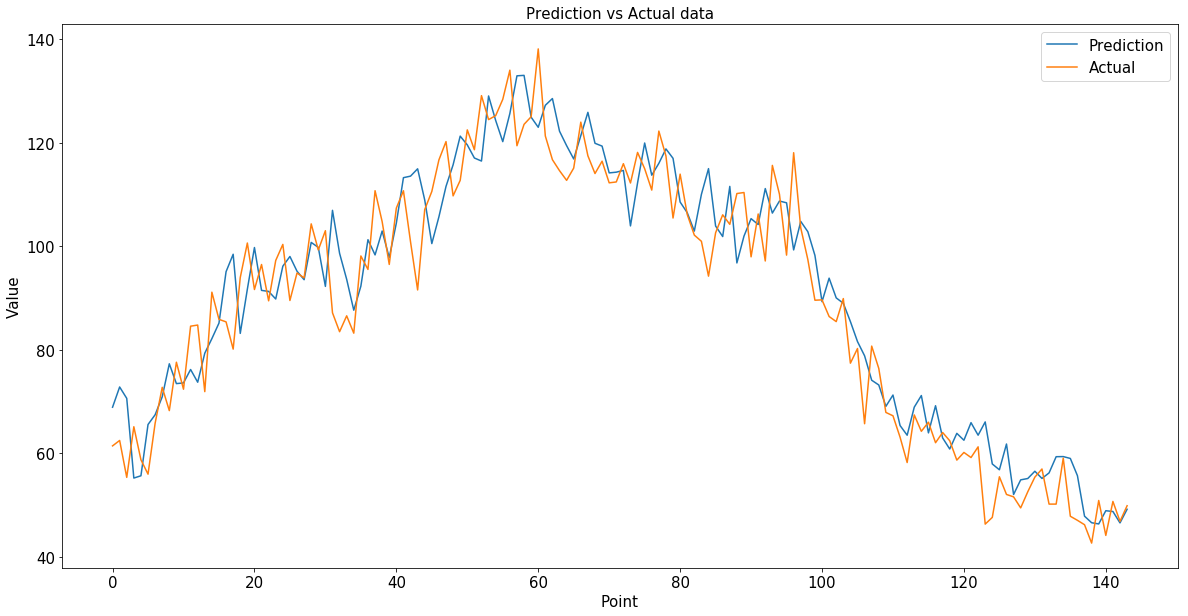

In [28]:
out = ARmod(train, test, 144)
error(out, test)
plot(out, test)

### 6.e

6.983475819787602


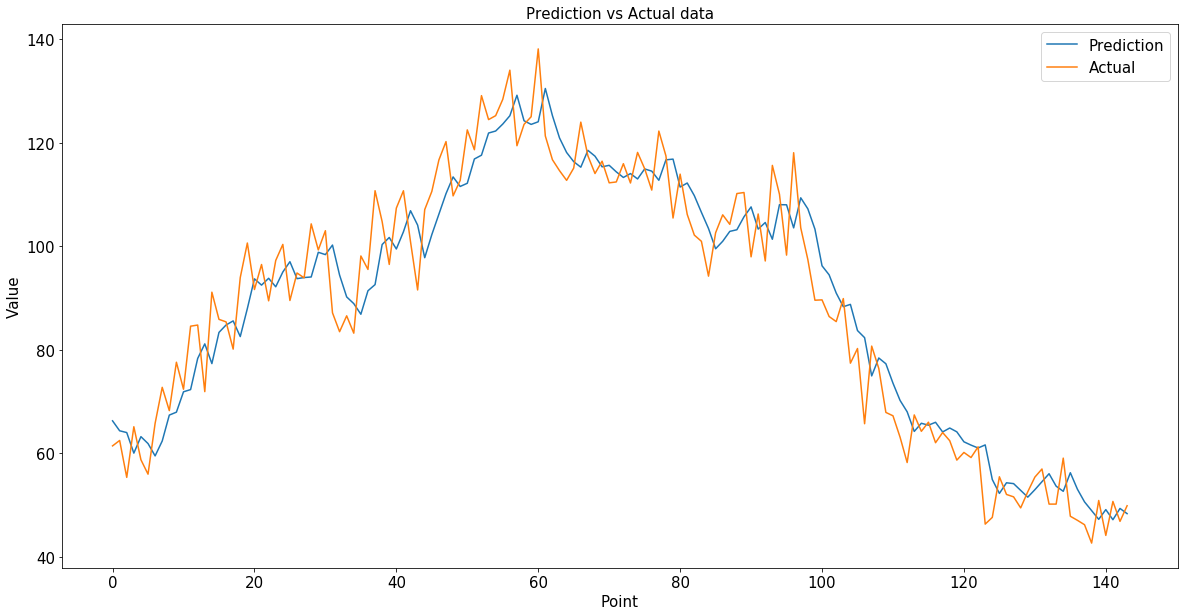

In [29]:
out = ARmod(train, test, 6)
error(out, test)
plot(out, test)

### 6.f Conclusion: EWMA with alpha value 0.5 gives least average error as given in the question, whereas Seasonal model gives maximum error.